<a href="https://colab.research.google.com/github/raunaksatone5/Decision-Tree-Implementation/blob/main/Decision_Trees_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The file **daily_weather.csv** is a comma-separated file that contains weather data.    The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

**Problem: Use morning sensor signals as features to predict whether the humidity will be high at 3pm.**


First we import the necessary libraries of the python for demostration of the Decision Tree Classifier.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Read the data of the weather from the csv file using read_csv function of pandas dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 2/Day 3/data/daily_weather.csv')

In [ ]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [ ]:
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'high_humidity_3pm'],
      dtype='object')

In [ ]:
data.shape

(1095, 10)

In [ ]:
data.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,0.499543
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,0.500228
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,0.000000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,0.000000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [ ]:
data['high_humidity_3pm'].value_counts()

0    535
1    529
Name: high_humidity_3pm, dtype: int64

Removing the rows which contains the null values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(1064, 10)

In [ ]:
dependent_variable = 'high_humidity_3pm'

In [ ]:
independent_variables = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [ ]:
X = data[independent_variables]

In [ ]:
y = data[dependent_variable]

By using train_test_split we have split the data into traing dataset and testing datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

Fit on Train Set

In [ ]:
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Predict on Test Set

In [ ]:
y_predicted = humidity_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test[:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_3pm, dtype: int64

### Measure Accuracy of the Classifier

In [ ]:
accuracy_score(y_test, y_predicted) * 100

90.9090909090909

In [ ]:
data.iloc[-1]

air_pressure_9am          921.530000
air_temp_9am               77.702000
avg_wind_direction_9am     97.100000
avg_wind_speed_9am          3.265932
max_wind_direction_9am    125.900000
max_wind_speed_9am          4.451511
rain_accumulation_9am       0.000000
rain_duration_9am           0.000000
relative_humidity_9am      14.560000
high_humidity_3pm           0.000000
Name: 1094, dtype: float64

### Visulaizing Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

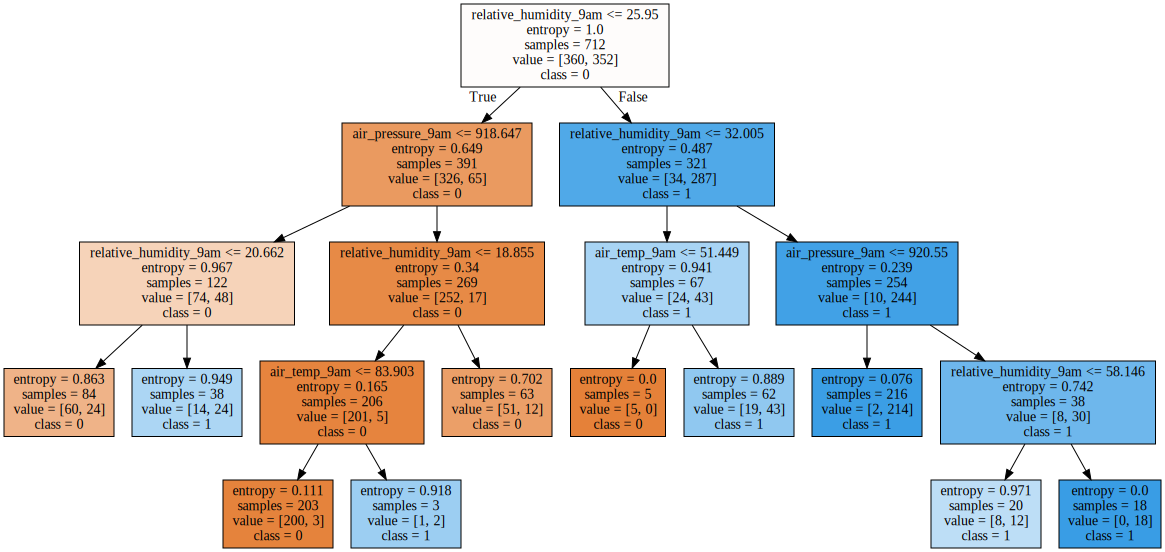

In [ ]:
graph = Source(tree.export_graphviz(humidity_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

### Advantages
<b>Easy to Understand:</b> Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. Its graphical representation is very intuitive and users can easily relate their hypothesis.


<b>Useful in Data exploration: </b> Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. It can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable.
</b>Less data cleaning required:</b> It requires less data cleaning compared to some other modeling techniques. <b>It is not influenced by outliers and missing values to a fair degree.</b>


<b>Non Parametric Method:</b> Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

### <b>Disadvantages</b>


<b>Over fitting:</b> Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.